In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/scratch/anissa.el/MacroMicroNichesElMarrahi2022/data_analysis/notebooks/nature_cancer_building_blocks_analysis'

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.archetypes import ArchetypalAnalysis
from src.utils.visualization import plot_scatter_pca, plot_3Dscatter_pca, archetypes_bar_plot, archetype_simple_plot
from src.utils.equations import arch2color, alfa2rgb, scale, color_mapper

In [9]:
ROOT_DATA_PATH = "../../data/tnbc_nature_cancer_dataset"
CELL_TYPES = ['Fibroblasts', 'Endothelial', 'T cells', 'B cells', 'Cancer', 'Vascular SMA+', 'Myoepithelial', 'Macrophages']
patient_ids = [ 88, 428, 357, 389, 303, 445, 374,  33, 549, 537, 477, 393, 429, 329, 443, 305, 105, 469, 555, 
               532,   6,  40, 415,   7, 221, 10, 395, 494, 332, 409,  87, 479, 359,  36, 265, 273, 229, 261, 
               184, 181, 521, 102, 468, 509,  92,  94, 331, 260, 250, 233, 234,236, 231, 170, 365, 175, 154,  19, 
               132,  98,  58,  61,  16,  63,432, 361, 263, 426, 366,  35, 340,   1, 336]

In [10]:
len(patient_ids)

73

In [14]:
N_SITE = 100
RADIUS = 100

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids,s_ids,_ = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)

In [ ]:
#SLOW
n_archs = list(range(2, 6))

lst_exp_var = []
for n_arch in n_archs:
    AA = ArchetypalAnalysis(n_archetypes = n_arch, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
    AA.fit(pc[:, :3])
    lst_exp_var.append(AA.explained_variance_)

plt.plot(n_archs, lst_exp_var, '-o')
plt.ylim(0, 1)
plt.show()

In [7]:
AA_3D = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0,
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)

In [8]:
#SLOW
AA_3D.fit_transform(pc[:, :3])

array([[-48.49693916, -19.29525527,  -4.28981908],
       [-46.50475432, -20.30734116,  -4.2087136 ],
       [-48.5426245 ,  -6.60679488,  -5.9855755 ],
       ...,
       [-18.06014822, -12.24926714,  11.64231851],
       [ 42.24324379,   6.68483759,  12.05033211],
       [  7.84034304,  -6.70960389,   3.83940611]])

In [9]:
import pickle
with open("../../output/pca_3d_nature", "wb") as f:
    pickle.dump(pca, f)

with open("../../output/AA_3D_nature", "wb") as f:
    pickle.dump(AA_3D, f)

In [10]:
import pickle

with open("../../output/pca_3d_nature", "rb") as f:
    pca = pickle.load(f)

with open("../../output/AA_3D_nature", "rb") as f:
    AA_3D = pickle.load(f)

In [11]:
len(AA_3D.archetypes)

3

In [12]:
def round2one(v):
    return v if v <= 1.0 else 1.0
color_map = np.array([[255, 0, 0], [0, 153, 51], [0, 0, 255], [255, 255, 0]]).T
sites_archetype = [np.array([round2one(x) for x in color_mapper(color_map, c)/255]) for c in AA_3D.alfa.T]
p = np.array(sites_archetype)
len(sites_archetype)

4178

0.97% Total Exp. Var.


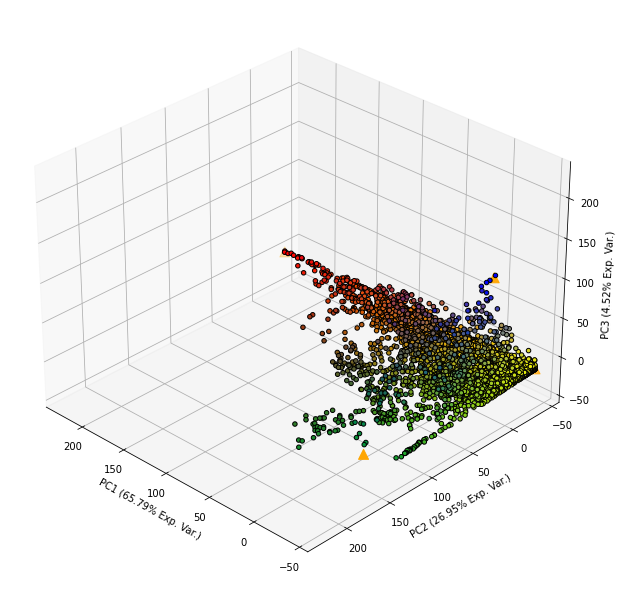

In [13]:
plot_3Dscatter_pca(pc, pca.explained_variance_ratio_, labels=sites_archetype, archetypes=AA_3D.archetypes)

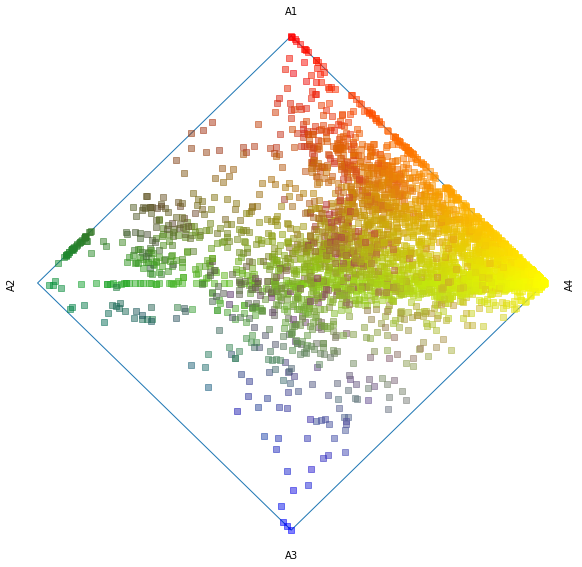

In [14]:
AA_3D.plot_simplex(AA_3D.alfa, plot_args={'c': sites_archetype})

In [15]:
n_comp = 3
res = np.dot(AA_3D.archetypes.T, pca.components_[:n_comp,:])+np.mean(sites, axis=0)

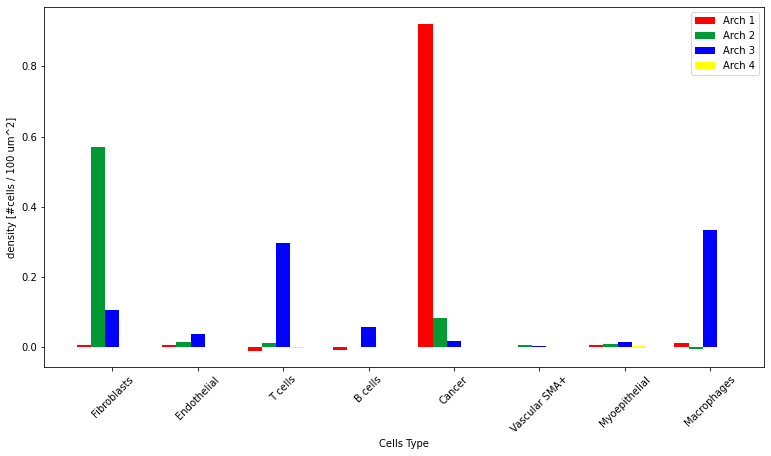

In [16]:
archetype_colors = [[1., 0., 0.], [0. , 0.6, 0.2], [0., 0., 1.], [1.0, 1.0, 0.]]
archetypes_bar_plot(res, CELL_TYPES, archetype_colors, y_axis='density', radius=RADIUS)

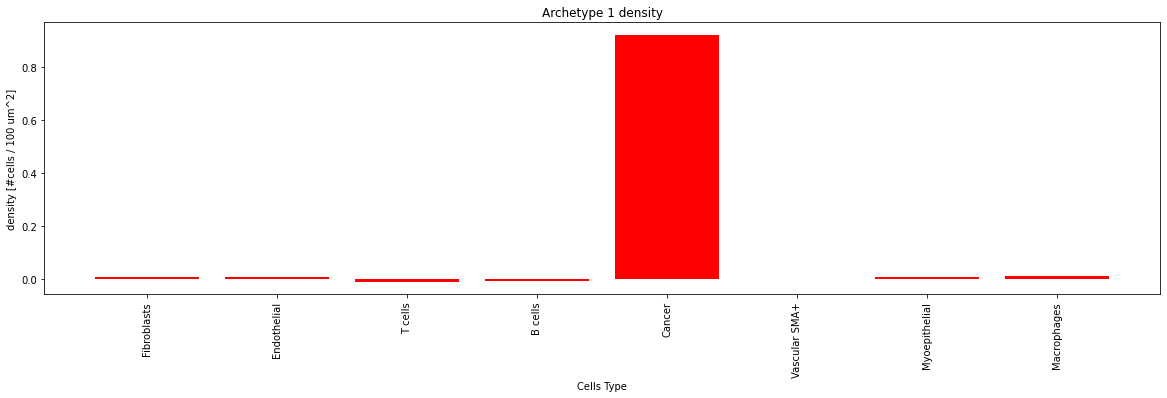

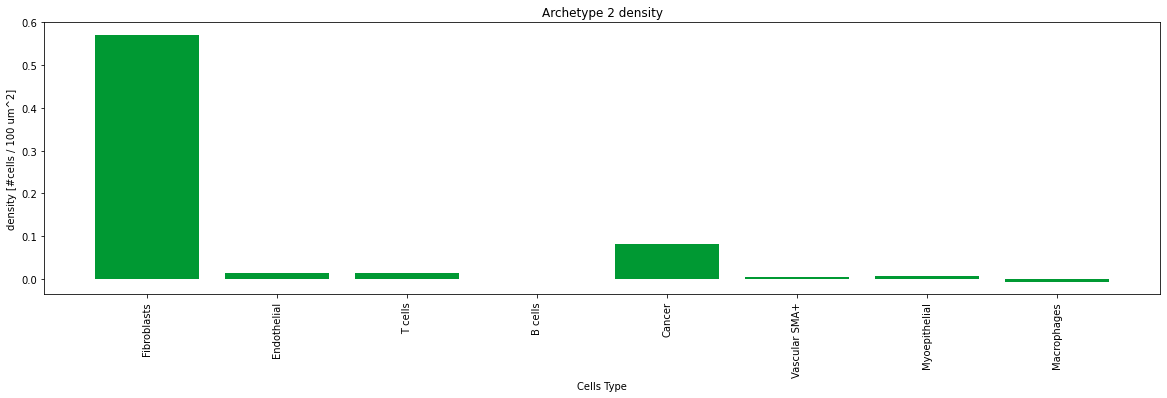

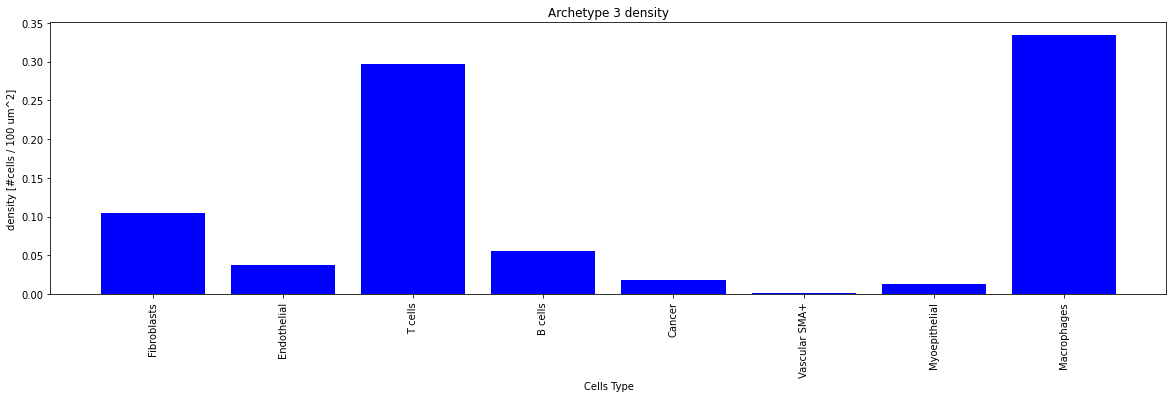

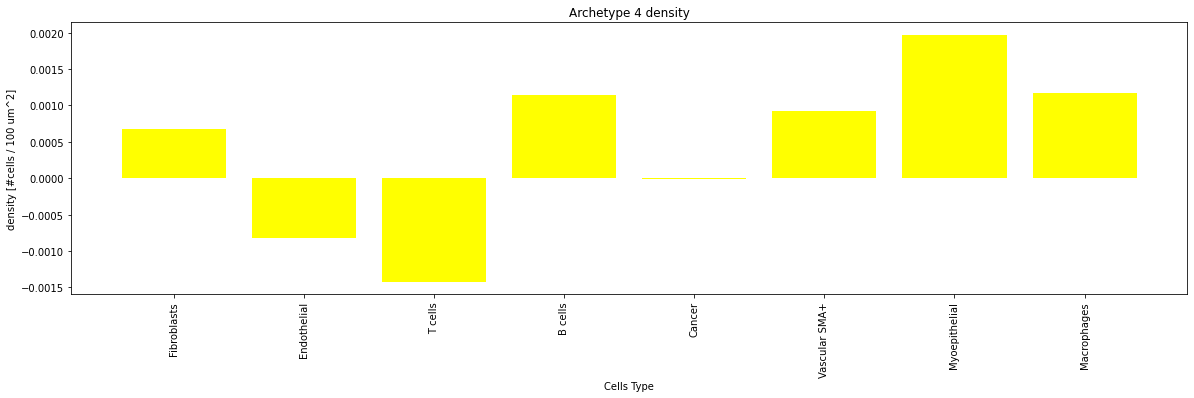

In [17]:
for a in range(4):
    archetype_simple_plot(res[a], a, archetype_colors, CELL_TYPES, y_axis='density')